In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")
os.getcwd()
os.chdir('D:\Data\Kaggle\Titanic')

In [ ]:
training=pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

training.head()
test.head()

training['train_test']=1
test['train_test']=0
test['Survived']=np.NaN

ds=pd.concat([training,test])
ds.head()
#ds.columns

In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [4]:
training.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
train_test,891.0,1.000000,0.000000,1.00,1.0000,1.0000,1.0,1.0000


In [5]:
training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
train_test       0
dtype: int64

In [6]:
df_num=training[['Age','SibSp','Parch','Fare']]
df_categorical=training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

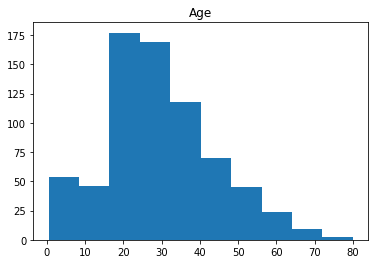

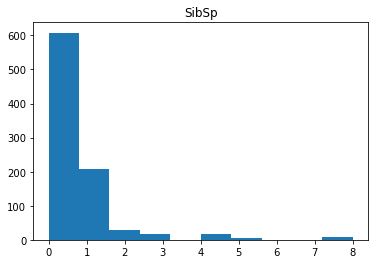

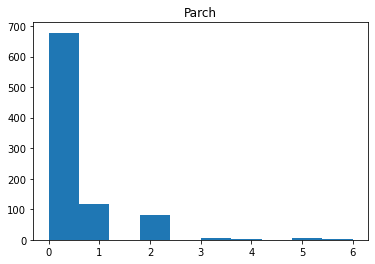

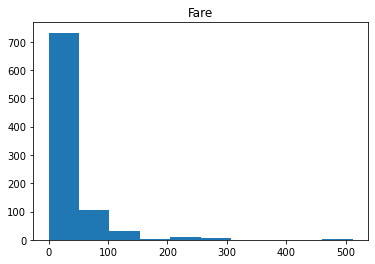

In [7]:
for i in df_num:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

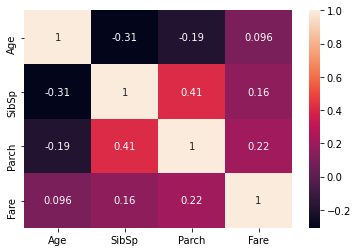

In [8]:
print(df_num.corr())
sns.heatmap(df_num.corr(),annot=True)

In [9]:
pd.pivot_table(training,index='Survived',values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


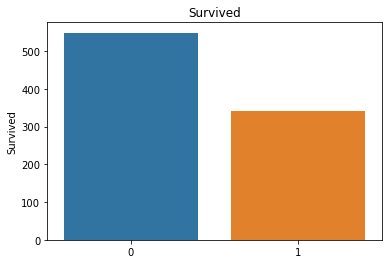

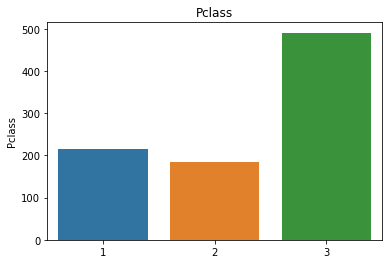

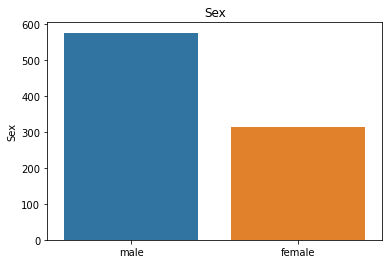

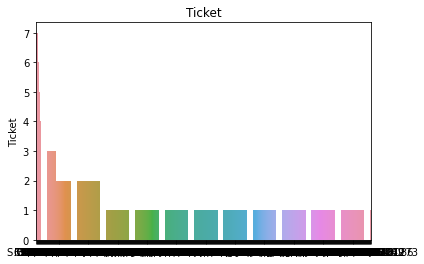

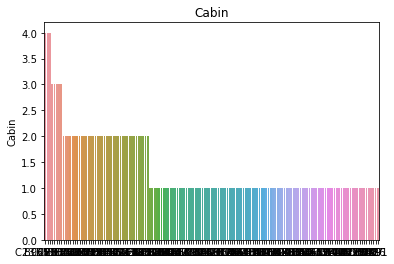

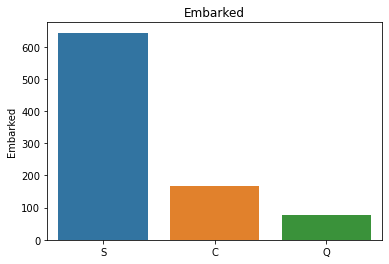

In [10]:
for i in df_categorical:
    sns.barplot(df_categorical[i].value_counts().index,df_categorical[i].value_counts()).set_title(i)
    plt.show()

In [11]:
print(pd.pivot_table(training,index='Survived',columns='Pclass',values='Ticket',aggfunc='count'))

print(pd.pivot_table(training,index='Survived',columns='Sex',values='Ticket',aggfunc='count'))

print(pd.pivot_table(training,index='Survived',columns='Embarked',values='Ticket',aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Sex       female  male
Survived              
0             81   468
1            233   109
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [12]:
ds['cabin_mul']=ds.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))
ds['cabin_adv']=ds.Cabin.apply(lambda x:str(x)[0])
ds['ticket_numeric']=ds.Ticket.apply(lambda x:1 if x.isnumeric() else 0)
ds['ticketletters']=ds.Ticket.apply(lambda x: ''.join(x.split(" ")[:-1]).replace('.','').replace('/','').lower if len(x.split(" ")[:-1])>0 else 0)
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_mul,cabin_adv,ticket_numeric,ticketletters
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,n,0,<built-in method lower of str object at 0x0000...
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,C,0,<built-in method lower of str object at 0x0000...
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,n,0,<built-in method lower of str object at 0x0000...
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,C,1,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,n,1,0


In [13]:
ds.Age=ds.Age.fillna(training.Age.mean())
ds.Fare=ds.Age.fillna(training.Fare.median())

#
ds.dropna(subset=['Embarked'],inplace=True)

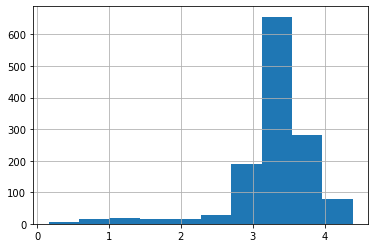

In [14]:
ds['fare_norm']=np.log(ds.Fare+1)
ds['fare_norm'].hist()

ds.Pclass=ds.Pclass.astype(str)

In [15]:
all_dummies=pd.get_dummies(ds[['Age','Pclass','Sex','SibSp','Parch','fare_norm','Embarked','cabin_adv','cabin_mul','ticket_numeric','train_test']])

In [17]:
all_dummies.head()

,Age,SibSp,Parch,fare_norm,cabin_mul,ticket_numeric,train_test,Pclass_1,Pclass_2,Pclass_3,...,Embarked_S,cabin_adv_A,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_T,cabin_adv_n
0,22.0,1,0,3.135494,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,38.0,1,0,3.663562,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,26.0,0,0,3.295837,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,35.0,1,0,3.583519,1,1,1,1,0,0,...,1,0,0,1,0,0,0,0,0,0
4,35.0,0,0,3.583519,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [26]:
X_train=all_dummies[all_dummies.train_test==1].drop(['train_test'],axis=1)
X_test=all_dummies[all_dummies.train_test==0].drop(['train_test'],axis=1)

y_train=ds[ds.train_test==1].Survived
y_train.value_counts()

0.0    549
1.0    340
Name: Survived, dtype: int64

In [28]:
#Scale data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
all_dummies_scaled=all_dummies.copy()
all_dummies_scaled[['Age','SibSp','fare_norm','Parch']]=scale.fit_transform(all_dummies_scaled[['Age','SibSp','fare_norm','Parch']])
all_dummies_scaled

#Split
X_train_scale=all_dummies_scaled[all_dummies_scaled.train_test==1].drop(['train_test'],axis=1)
X_test_scale=all_dummies_scaled[all_dummies_scaled.train_test==0].drop(['train_test'],axis=1)

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
cv=cross_val_score(gnb,X_train_scale,y_train,cv=5)
print(cv)
print(cv.mean())

[0.66292135 0.67977528 0.7247191  0.71910112 0.80225989]
0.7177553481876469


In [34]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
cv=cross_val_score(lr,X_train_scale,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79775281 0.79775281 0.81460674 0.78651685 0.83615819]
0.8065574811147084


In [41]:
from sklearn.svm import SVC
sv=SVC()
cv1=cross_val_score(sv,X_train_scale,y_train,cv=5)
print(cv1)
print(cv1.mean())

[0.82022472 0.81460674 0.80337079 0.80337079 0.85310734]
0.8189360756681268


In [38]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
cv=cross_val_score(rf,X_train_scale,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.80337079 0.80898876 0.76966292 0.81920904]
0.7941788865612898


In [40]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
cv=cross_val_score(kn,X_train_scale,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76404494 0.80898876 0.79213483 0.79213483 0.83050847]
0.7975623690725576


In [48]:
from sklearn import metrics

y_train_predict=sv.predict(X_train_scale)
model_score=sv.score(X_train_scale,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8368953880764904
[[496  53]
 [ 92 248]]
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       549
         1.0       0.82      0.73      0.77       340

    accuracy                           0.84       889
   macro avg       0.83      0.82      0.82       889
weighted avg       0.84      0.84      0.83       889



In [52]:
sv.fit(X_train_scale,y_train)
y_test_predict=sv.predict(X_test_scale)

sub={'PassengerId':test.PassengerId,'Survived':y_test_predict}
sub=pd.DataFrame(data=sub)
sub.to_csv('sub.csv', index=False)